## Problem Statement : Predicting the price of cryptocurrency Bitcoin

* We will be using LSTM. LSTM is a kind of Recurrent Neural Network that are suited for time-series problems and have become famous in the world of stock-market predictions and/or cryptocurrency market predictions. 

* An RNN can be thought of as the multiple copies of the same network, each passing a message to the successor. 

* An LSTM is about selectively remembering patterns for long duration of time. 

* Technologies used - Python 3.5, Keras, Pandas, Numpy, Jupyter-Notebook, seaborn, Matplotlib.

# 1. Data from cryptocompare

### Fetching the data 

In [148]:
import json
import requests
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#### Fetching the Bitcoin price data from the cryptocompare. We have data from 2012-10-10 until 2108-05-07.

In [149]:
endpnt = 'https://min-api.cryptocompare.com/data/histoday'
request = requests.get(endpnt + '?fsym=BTC&tsym=USD&limit=2000')
hist = pd.DataFrame(json.loads(request.content)['Data'])
hist

,close,high,low,open,time,volumefrom,volumeto
0,11.75,11.80,11.17,11.20,1353024000,58253.16,6.694222e+05
1,11.79,11.80,11.52,11.75,1353110400,19105.45,2.230395e+05
2,11.65,11.83,11.62,11.79,1353196800,15514.15,1.817170e+05
3,11.80,11.84,11.60,11.65,1353283200,25197.92,2.952608e+05
4,11.73,11.80,11.57,11.80,1353369600,27220.18,3.182912e+05
5,11.77,11.78,11.64,11.73,1353456000,19227.80,2.253087e+05
6,12.42,12.43,11.67,11.77,1353542400,58301.30,7.035829e+05
7,12.35,12.41,12.13,12.42,1353628800,18967.90,2.333709e+05
8,12.41,12.48,12.25,12.35,1353715200,19570.39,2.420586e+05
9,12.48,12.60,12.31,12.41,1353801600,24023.69,2.999894e+05


In [150]:
# Converting time to proper datetime format 

hist = hist.set_index('time')
hist.index = pd.to_datetime(hist.index, unit='s')

In [151]:
### Checking the data by doing hist.tail() and hist.head()

In [152]:
hist.tail()


,close,high,low,open,volumefrom,volumeto
time,,,,,,
2018-05-05,9845.90,9968.85,9687.09,9700.37,68875.75,6.798724e+08
2018-05-06,9644.92,9936.96,9441.93,9846.44,62904.49,6.086502e+08
2018-05-07,9377.81,9662.23,9202.13,9643.99,73842.44,6.925801e+08
2018-05-08,9196.13,9472.09,9063.07,9377.08,72659.12,6.739241e+08
2018-05-09,9130.60,9204.71,9130.60,9196.13,3069.16,2.821833e+07


In [170]:
hist.head()


,close,high,low,open,volumefrom,volumeto
time,,,,,,
2012-11-16,11.75,11.80,11.17,11.20,58253.16,669422.19
2012-11-17,11.79,11.80,11.52,11.75,19105.45,223039.47
2012-11-18,11.65,11.83,11.62,11.79,15514.15,181716.98
2012-11-19,11.80,11.84,11.60,11.65,25197.92,295260.75
2012-11-20,11.73,11.80,11.57,11.80,27220.18,318291.25


#### Target is the column close 

In [171]:
target_col = 'close'


### Splitting the data into train and test data. 

* Last 10 percent is utilized for testing.

In [172]:
def train_test_split(df, test_size=0.1):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data

In [173]:
train, test = train_test_split(hist, test_size=0.1)


### After splitting the data, plotting the "close" column of the dataframe, which is essentially the daily closing price which we are intended to predict. 

In [174]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(16, 9))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('price [USD]', fontsize=14)
    ax.set_title(title, fontsize=18)
    ax.legend(loc='best', fontsize=18);

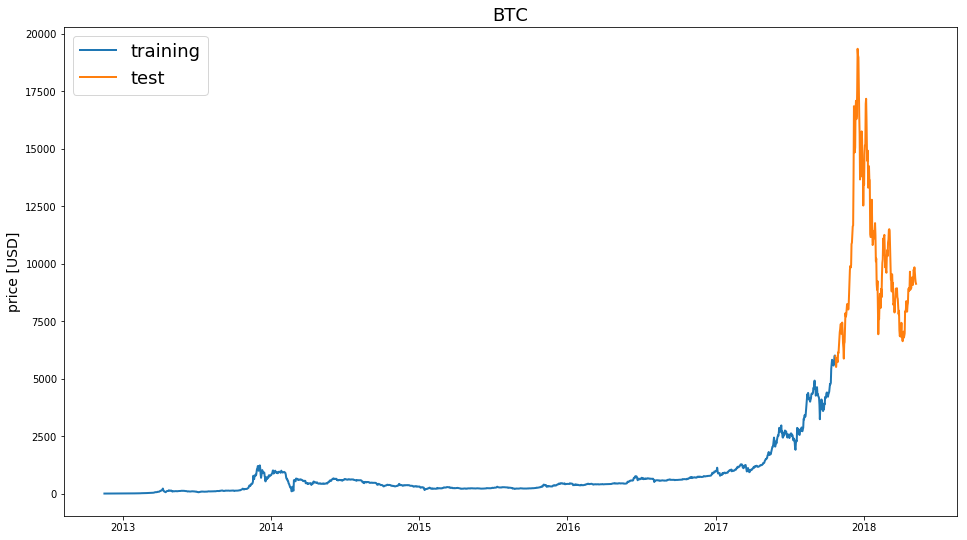

In [175]:
line_plot(train[target_col], test[target_col], 'training', 'test', title='BTC')


## Building the Model

* For training of the LSTM, the data was split into windows of 7 days, and within each window, I would normalize the data to zero base, which means that the first entry of each window is 0 and all other values represent the change with respect to the first value. 

* Hence, I would be predicting price changes rather than absolute price. 

#### Next , we will normalise the dataframe column-wise to reflect changes with respect to first entry.

In [176]:
def normalise_zero_base(df):
    return df / df.iloc[0] - 1



#### Next, we will normalise dataframe column-wise min/max.



In [177]:
def normalise_min_max(df):
    return (df - df.min()) / (data.max() - df.min())

#### Converting the dataframe to overlapping sequences/windows of len window_data.

In [178]:
def window_data(df, window_len=10, zero_base=True):

    window_data = []
    for idx in range(len(df) - window_len):
        tmp = df[idx: (idx + window_len)].copy()
        if zero_base:
            tmp = normalise_zero_base(tmp)
        window_data.append(tmp.values)
    return np.array(window_data)

#### Prepare the data for LSTM. 



In [179]:
def prepare_data(df, target_col, window_len=10, zero_base=True, test_size=0.2):
    # train test split
    train_data, test_data = train_test_split(df, test_size=test_size)
    
    # window data
    X_train = window_data(train_data, window_len, zero_base)
    X_test = window_data(test_data, window_len, zero_base)
    
    # extract targets
    y_train = train_data[target_col][window_len:].values
    y_test = test_data[target_col][window_len:].values
    if zero_base:
        y_train = y_train / train_data[target_col][:-window_len].values - 1
        y_test = y_test / test_data[target_col][:-window_len].values - 1

    return train_data, test_data, X_train, X_test, y_train, y_test

## Using a simple neural network with a single LSTM layer consisting of 20 neurons, a dropout factor of 0.25, and a Dense layer with the single linear activation function. 

## Mean Absolute Error(MAE) is used as a loss function along with Adam optimiser.

In [180]:
def build_lstm_model(input_data, output_size, neurons=20, activ_func='linear',
                     dropout=0.25, loss='mae', optimizer='adam'):
    model = Sequential()

    model.add(LSTM(neurons, input_shape=(input_data.shape[1], input_data.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model

### Will be training the network for 100 epochs for a batch size of 4. 

In [181]:
np.random.seed(42)
# data parameters
window_len = 7
test_size = 0.1
zero_base = True

# model parameters
lstm_neurons = 20
epochs = 100
batch_size = 4
loss = 'mae'
dropout = 0.25
optimizer = 'adam'

In [182]:
train, test, X_train, X_test, y_train, y_test = prepare_data(
    hist, target_col, window_len=window_len, zero_base=zero_base, test_size=test_size)

In [166]:
model = build_lstm_model(
    X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss,
    optimizer=optimizer)
history = model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

Epoch 1/100
1794/1794 [==============================] - 13s 7ms/step - loss: 0.0799
Epoch 2/100
1794/1794 [==============================] - 5s 3ms/step - loss: 0.0561
Epoch 3/100
1794/1794 [==============================] - 6s 3ms/step - loss: 0.0489
Epoch 4/100
1794/1794 [==============================] - 5s 3ms/step - loss: 0.0436
Epoch 5/100
1794/1794 [==============================] - 5s 3ms/step - loss: 0.0410
Epoch 6/100
1794/1794 [==============================] - 6s 3ms/step - loss: 0.0404
Epoch 7/100
1794/1794 [==============================] - 6s 3ms/step - loss: 0.0389
Epoch 8/100
1794/1794 [==============================] - 5s 3ms/step - loss: 0.0381
Epoch 9/100
1794/1794 [==============================] - 6s 3ms/step - loss: 0.0379
Epoch 10/100
1794/1794 [==============================] - 5s 3ms/step - loss: 0.0374
Epoch 11/100
1794/1794 [==============================] - 5s 3ms/step - loss: 0.0364
Epoch 12/100
1794/1794 [==============================] - 6s 3ms/step - l

1794/1794 [==============================] - 2s 1ms/step - loss: 0.0345
Epoch 98/100
1794/1794 [==============================] - 3s 1ms/step - loss: 0.0340
Epoch 99/100
1794/1794 [==============================] - 2s 1ms/step - loss: 0.0343
Epoch 100/100
1794/1794 [==============================] - 2s 1ms/step - loss: 0.0346


In [183]:
targets = test[target_col][window_len:]
preds = model.predict(X_test).squeeze()

In [184]:
mean_absolute_error(preds, y_test)


0.04610578556543145

# Results

* Using the trained model to predict on the left-out test set, we would obtain the graph shown below. 
* There is something inherently wrong with the results and if we see clearly it becomes very clear that the prediction is tracking the previous day values which will become very clear in the next plot as we are tracking just the last 30 days actual vs predicted values. 

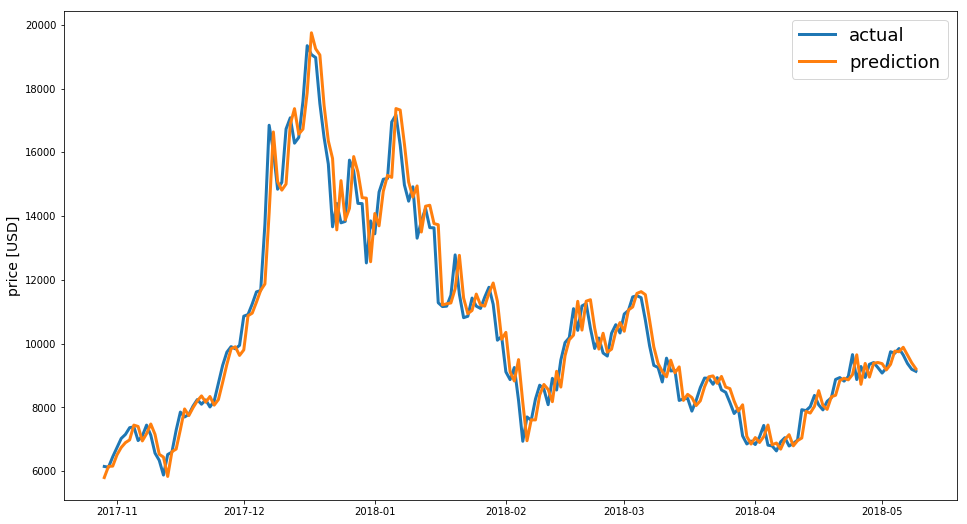

In [185]:
preds = test[target_col].values[:-window_len] * (preds + 1)
preds = pd.Series(index=targets.index, data=preds)

line_plot(targets, preds, 'actual', 'prediction', lw=3)

* Here using only last 30 points it becomes crystal clear, that the present day value is predicted using the previous day values. 

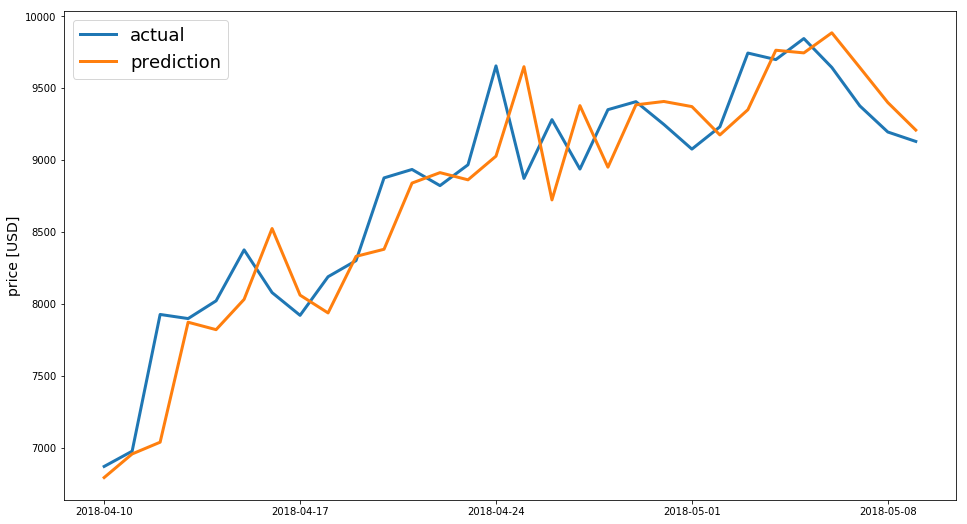

In [186]:
number_points = 30

line_plot(targets[-number_points:], preds[-number_points:], 'actual', 'prediction', lw=3)

* So when we adjust the predictions and shift them by a day, this observation become obvious.

* The model is essentially learning the price at the previous day. 

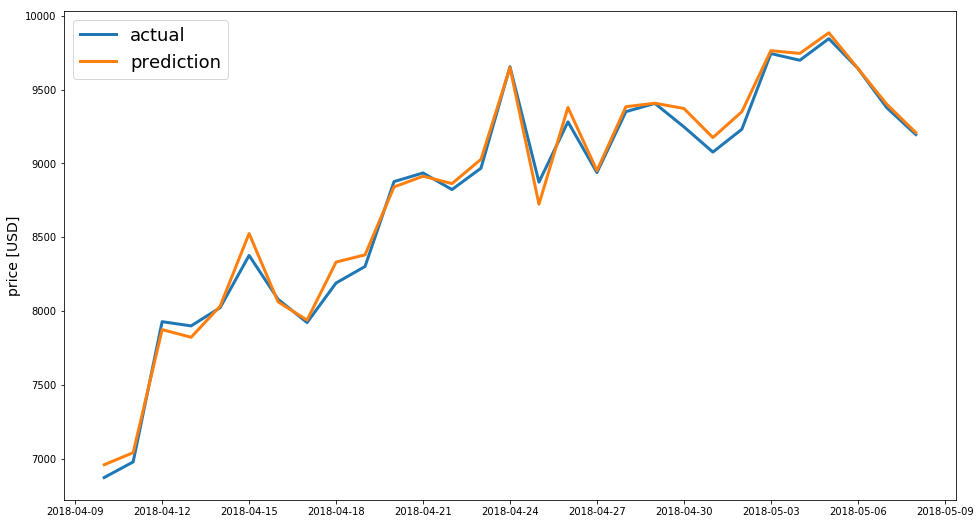

In [187]:
line_plot(targets[-number_points:][:-1], preds[-number_points:].shift(-1), 'actual', 'prediction', lw=3)


* To understand this further, lets compute the expected returns as predicted by the model and compare those with the actual returns. 

In [122]:
actual_returns = targets.pct_change()[1:]
predicted_returns = preds.pct_change()[1:]

In [123]:
def dual_line_plot(line1, line2, line3, line4, label1=None, label2=None, title='', lw=2):
    import matplotlib.dates as mdates
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(21, 9))
    ax1.plot(line1, label=label1, linewidth=lw)
    ax1.plot(line2, label=label2, linewidth=lw)
    ax2.plot(line3, label=label1, linewidth=lw)
    ax2.plot(line4, label=label2, linewidth=lw)
    ax2.set_xticks(ax1.get_xticks())
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.set_ylabel('daily returns', fontsize=14)
    ax2.legend(loc='best', fontsize=18);

* Now if we look at the actual and predicted returns, both in their original form as well as with the 1-day shift applied to them, we obtain the same observation. 

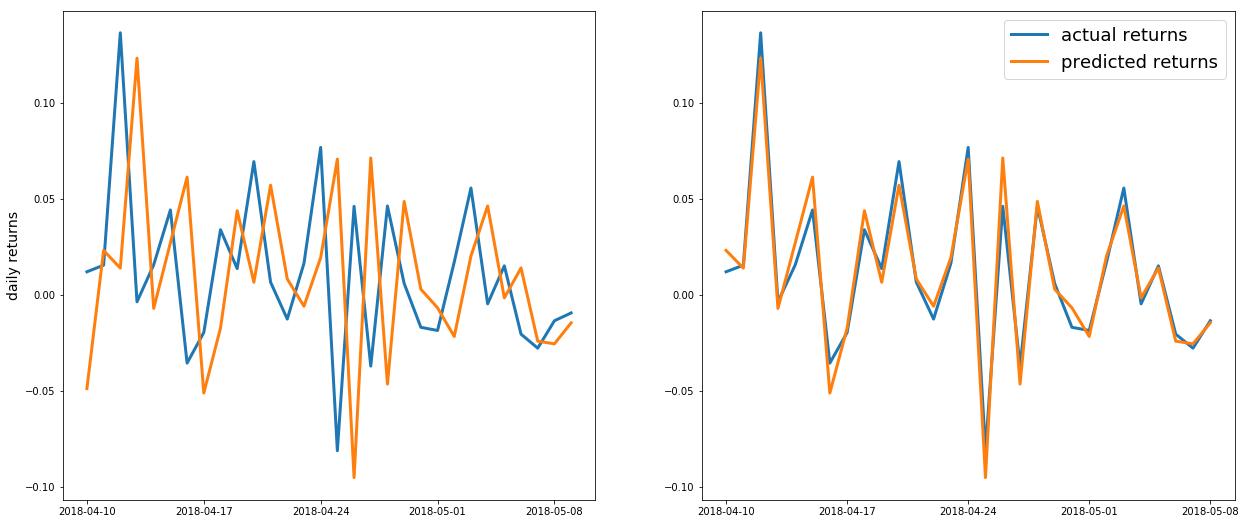

In [124]:
dual_line_plot(actual_returns[-number_points:],
          predicted_returns[-number_points:],
          actual_returns[-number_points:][:-1],
          predicted_returns[-number_points:].shift(-1),
          'actual returns', 'predicted returns', lw=3)

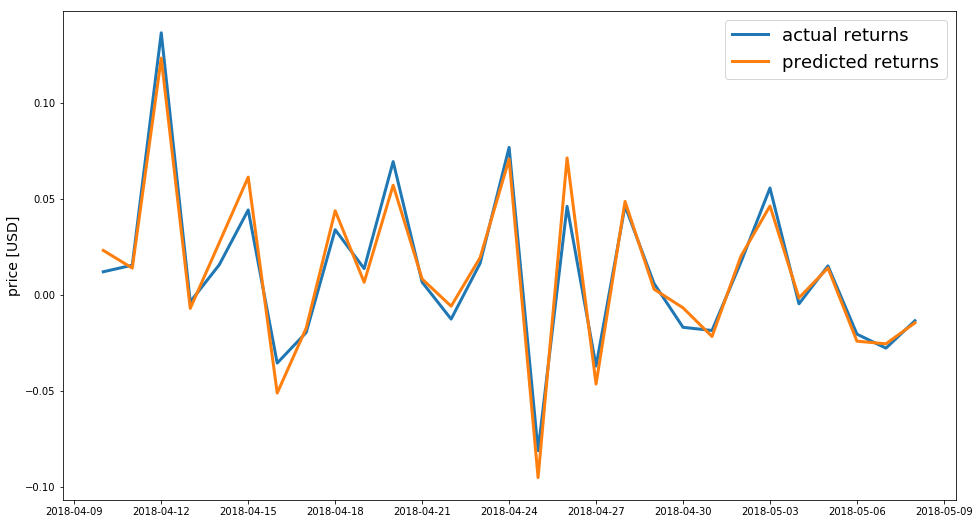

In [125]:
line_plot(actual_returns[-number_points:][:-1], predicted_returns[-number_points:].shift(-1),
           'actual returns', 'predicted returns', lw=3)

* Actually, if we compute the correlation between actual and predicted returns both for the original predictions as well as for those adjusted by a day, we can make the following observation:



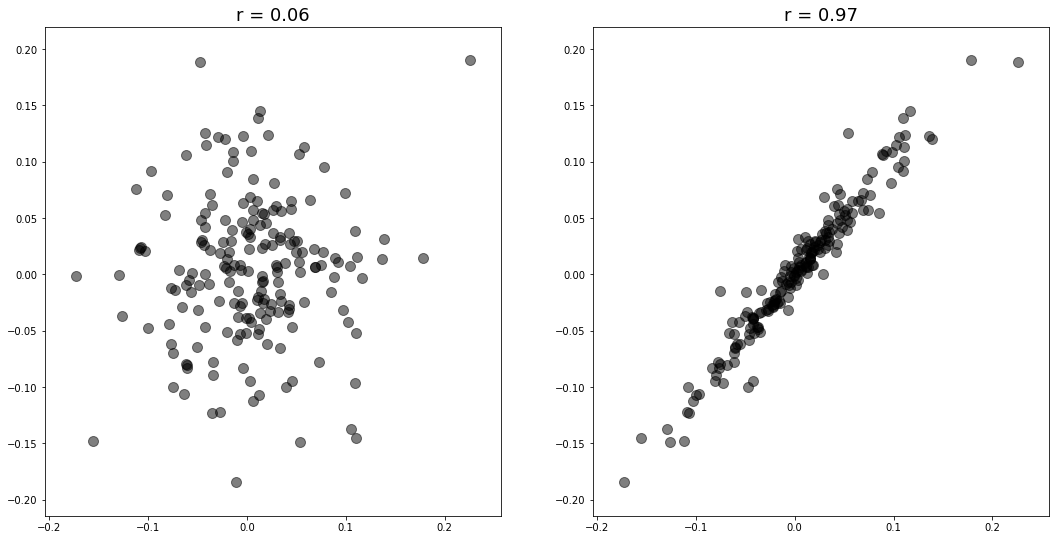

In [126]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

# actual correlation
corr = np.corrcoef(actual_returns, predicted_returns)[0][1]
ax1.scatter(actual_returns, predicted_returns, color='k', marker='o', alpha=0.5, s=100)
ax1.set_title('r = {:.2f}'.format(corr), fontsize=18)

# shifted correlation
shifted_actual = actual_returns[:-1]
shifted_predicted = predicted_returns.shift(-1).dropna()
corr = np.corrcoef(shifted_actual, shifted_predicted)[0][1]
ax2.scatter(shifted_actual, shifted_predicted, color='k', marker='o', alpha=0.5, s=100)
ax2.set_title('r = {:.2f}'.format(corr), fontsize=18);

* As you can see from the plots above, the actual and predicted returns are uncorrelated.
* Only after applying the 1-day-shift on the predictions we obtain highly correlated returns that resemble the returns of the actual bitcoin data.



### Hence as we saw above, the model using lstm from the past historic data is able to minimize the mean absolute error but in reality it is just tracking the previous day price. 

## Hence, this model is not viable for actual trading. 
